# Lab2: Assignments



## 1. Country Vaccination Dataset
We are going to look at a dataset about Covid-19 vaccination. To get some insigths about the dataset, you can use **pandas**. Remember that **pandas** has a wide range of functions. Official documentation: https://pandas.pydata.org/docs/user_guide/ 

### 1.1 Loading Data

Start by loading the dataset into a DataFrame. Since this notebook is not running on a server, check that the path to the dataset is the correct one on your computer or repository. 

In [1]:
import pandas as pd
dataset1 = pd.read_csv("country_vaccinations.csv")

To know the dimension of our dataset, we use the **shape** function. 
If you run the code you will see that "dataset1" has 3619 **data objects** represented with 15 **features**

In [2]:
dataset1.shape

(3619, 15)

### 1.2 Describing Data

Once we have an idea about the dataset, you can use the statistics to describe the data. For this purpose we can exploit several functions. One of the most used one is **describe()**. 
For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

If multiple object values have the highest count, then the count and top results will be arbitrarily chosen from among those with the highest count.

For mixed data types provided via a DataFrame, the default is to return only an analysis of numeric columns. If the dataframe consists only of object and categorical data without any numeric columns, the default is to return an analysis of both the object and categorical columns. If include='all' is provided as an option, the result will include a union of attributes of each type.


In [3]:
dataset1.describe()


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.393000e+03,1.981000e+03,1.324000e+03,2.019000e+03,3.483000e+03,2393.000000,1981.000000,1324.000000,3483.000000
mean,1.521028e+06,1.269657e+06,3.888861e+05,7.453608e+04,5.754796e+04,6.174785,5.243503,1.807364,2279.315820
std,5.038410e+06,4.148487e+06,1.476223e+06,2.065813e+05,1.784900e+05,11.530328,8.593589,4.604362,3788.432525
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.989300e+04,2.702000e+04,8.366000e+03,2.021000e+03,1.207500e+03,0.590000,0.610000,0.130000,349.000000
50%,1.917820e+05,1.694400e+05,3.395450e+04,1.164200e+04,6.081000e+03,2.420000,2.370000,0.720000,1039.000000
75%,7.689500e+05,6.324390e+05,1.947678e+05,5.658950e+04,2.922500e+04,5.570000,4.430000,1.512500,1978.000000
max,6.128950e+07,4.280960e+07,1.789567e+07,2.242472e+06,1.916190e+06,87.070000,49.750000,37.320000,30869.000000


The below example is when you need to include in the statistic sfeatures of type object. Run the following code and see what happens. 

In [6]:
import numpy as np
dataset1.describe(include=object)

,country,iso_code,date,vaccines,source_name,source_website
count,3619,3343,3619,3619,3619,3619
unique,98,94,70,19,59,94
top,Wales,GBR,2021-02-09,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://coronavirus.data.gov.uk/details/health...
freq,69,69,80,1029,1048,345


Another common technique we use in Machine Learning is to normalize our data. It often leads to a better performance. Here, by normalization we mean changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm).

For example, if $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$ then $$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$and        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$ Note that you can divide matrices of different sizes and it works fine: this is called broadcasting.


**Exercise**: Implement normalizeRows() to normalize the rows of a matrix. After applying this function to an input matrix x, each row of x should be a vector of unit length (meaning length 1).

In [8]:

def normalizeRows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).
    
    Argument:
    x -- A numpy matrix of shape (n, m)
    
    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    # Compute x_norm as the norm 2 of x. Use np.linalg.norm(..., ord = 2, axis = ..., keepdims = True)
    x_norm = np.linalg.norm(x, ord = 2, axis = 1, keepdims = True)
    
    # Divide x by its norm.
    x = x/x_norm
    ### END CODE HERE ###

    return x

In [9]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))

normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


Expected Output:

 <tr> 
   <td> **normalizeRows(x)** </td> 
   <td> [[ 0.          0.6         0.8       ]
[ 0.13736056 0.82416338 0.54944226]]

### 1.3 Data Cleaning

Data cleaning is a very important step in machine learning. 
For example, we always check for missing values in the data by running **isnull()** which checks for null Values, and returns a boolean array (an array of true for missing values and false for non-missing values). 
After you get a list of missing values you can get rid of them, or drop them by using **dropna()** to drop the rows or **dropna(axis=1)** to drop the columns. A different approach would be to fill the missing values with other values by using **fillna(x)** which fills the missing values with x (you can put there whatever you want) or s.fillna(s.mean()) to replace all null values with the mean (mean can be replaced with almost any function from the statistics section)

In [ ]:
dataset1.notnull()


**Exercise3**: Can missing values be replaced using prediction. If yes, explain the approach, if no explain why. 

####### Answer ######

Yes, prediction can be used to solve the problem of missing values. 
The feature with missing values can be defined as the response variable (dependent variable) to be predicted. Other features can be used as predictors. 
A regression model is then learned to predict missing values. 
####################################


**Exercise4**: Analyse the Vaccination Dataset and propose a machine learning task that can be acheived with such dataset. 

####### Answer ###########

Some interesting tasks could be:

1- Predict the number of totally vaccinated people (based on country, number of vacinated people per day, the type of vaccine, etc)

2- Predict the type of used vaccine based on the region of the countries and the number of vaccinated people 

3- Predict time series information 

####################################

## 2. Images Dataset

The below dataset ("data.h5") contains: - a training set of images labeled as cat (y=1) or non-cat (y=0). Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px). Let's get more familiar with the dataset. First you have to load the data.

In [10]:
import h5py
import numpy as np
dataset2 = h5py.File('train_catvnoncat.h5', "r")
images=np.array(dataset2["train_set_x"][:])



Each line of your "images" DataFrame is an array representing an image. You can visualize an example by running the following code. Feel free also to change the index value and re-run to see other images.

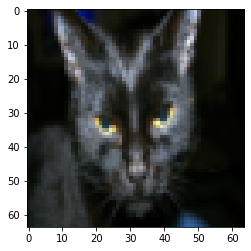

In [11]:
# Example of a picture
import matplotlib.pyplot as plt
index =25
plt.imshow(images[index])


Many software bugs in machine learning come from having matrix/vector dimensions that do not fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

**Exercise**: Find the values for: - m_images (number of images) - num_px (= height = width of an image).
Remember that **images** is a numpy-array of shape (m_, num_px, num_px, 3). For instance, you can access m_images by writing images.shape[0].

In [12]:
### START CODE HERE ### (≈ 2 lines of code)
m_images = images.shape[0]
num_px = images.shape[1]
### END CODE HERE ###

print ("Number of images: m_images = " + str(m_images))
print ("Height/Width of each image: num_px = " + str(num_px))


Number of images: m_images = 209
Height/Width of each image: num_px = 64


*Expected Outcome* 

*Number of images: m_train = 209*

*Height/Width of each image: num_px = 64*

For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px  ∗  num_px  ∗  3, 1). After this, the dataset will be a numpy-array where each column represents a flattened image. There should be m_image columns.

**Exercise**: Reshape the image dataset so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px  ∗  num_px  ∗  3, 1).A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b ∗ c ∗ d, a) is to use:

X_flatten = X.reshape(X.shape[0], -1).T        # X.T is the transpose of X

In [13]:
### START CODE HERE ### (≈ 1 lines of code)
dataset_flatten = images.reshape(images.shape[0], -1).T
### END CODE HERE ###

print ("images flatten shape: " + str(dataset_flatten.shape))

images flatten shape: (12288, 209)


*Expected Outcome: images flatten shape: (12288, 209)*